# Creamos el cuaderno para el clasificador

# Importamos las Librerias necesarias

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Importamos los datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/pixeles_data/
%ls

/content/drive/My Drive/Colab Notebooks/pixeles_data
histograma.csv


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pixeles_data/histograma.csv', sep = ',')
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,salida
0,4168,25,2370,651,49,2,221,326,1043,57,...,113,199,585,1,48,124,1873,68,6188,Forest
1,2712,180,3307,286,83,0,321,582,252,15,...,820,904,1124,0,9,966,2176,23,3873,Glacier
2,3581,10,2998,189,7,1,403,219,246,6,...,393,267,111,0,12,290,3250,8,4894,Glacier
3,2166,0,4733,16,1,0,284,82,33,1,...,84,159,16,0,12,62,5081,4,4788,Glacier
4,3190,16,3478,17,1,0,701,107,15,1,...,427,105,47,0,22,244,2949,0,5632,Glacier
5,3660,0,1561,489,17,0,421,1067,1101,47,...,426,602,487,1,189,497,1468,263,5391,Forest
6,2794,76,908,122,31,0,660,867,704,64,...,1562,2244,379,3,114,651,1745,76,5327,Glacier
7,4246,2,940,565,101,0,691,701,2240,98,...,195,315,435,0,159,240,1470,169,4818,Forest
8,3555,0,4256,275,0,0,21,107,119,1,...,133,43,345,0,86,193,2937,97,5225,Forest
9,2365,8,4507,37,2,0,582,61,69,4,...,59,80,88,1,5,62,4558,5,4435,Glacier


# Se separan los datos para ser usados después en la máquina de soporte vectorial

In [ ]:
x_train = df_train.iloc[:,0:-1]
x_train
y_train = df_train.iloc[:,-1]
y_train

0      Forest
1     Glacier
2     Glacier
3     Glacier
4     Glacier
5      Forest
6     Glacier
7      Forest
8      Forest
9     Glacier
10     Forest
11    Glacier
12    Glacier
13     Forest
14     Forest
15     Forest
16     Forest
17    Glacier
18    Glacier
19     Forest
Name: salida, dtype: object

In [ ]:
print(x_train.shape)
print(y_train.shape)

(20, 256)
(20,)


# Instamaciamos la SVM

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.001],'kernel':['rbf','poly', 'linear', 'sigmoid']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid, n_jobs=-1, verbose = 1, cv=5)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20,stratify=y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 256)
(4, 256)
(16,)
(4,)


In [ ]:
model.fit(x_train, y_train)
print('The Model is trained well with the given images')

Fitting 5 folds for each of 80 candidates, totalling 400 fits
The Model is trained well with the given images


# Evaluamos y obtenemos los resultados

In [ ]:
from sklearn import metrics
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [ ]:
model.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

Confusion_matrix:


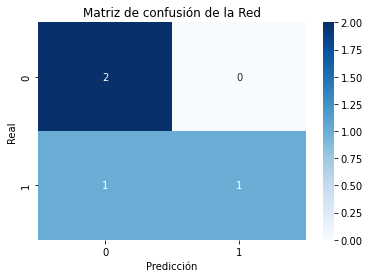

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



# MAE=metrics.mean_absolute_error(y_test, y_pred)
# MSE=metrics.mean_squared_error(y_test, y_pred)
# RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

# MAE=str(round(MAE, 4))
# MSE=str(round(MSE, 4))
# RMSE=str(round(RMSE, 4))

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicción');ax.set_ylabel('Real'); 
ax.set_title('Matriz de confusión de la Red'); 

In [ ]:
precision=precision_score(y_test, y_pred, average='micro')
precision=str(round(precision, 4))
recall=recall_score(y_test, y_pred, average='micro')
recall=str(round(recall, 4))
f1=f1_score(y_test, y_pred, average='micro')
f1=str(round(f1, 4))


In [ ]:
colums = ['Accuracy', 'Precision', 'Recall', 'F1']
vals = {'Accuracy': 0.6528571428571428, 'Precision':0.6529, 'Recall':0.6529, 'F1':0.6529}
df_metrics = pd.DataFrame(columns=colums)
df_metrics = df_metrics.append(vals, ignore_index=True)
df_metrics

,Accuracy,Precision,Recall,F1
0,0.652857,0.6529,0.6529,0.6529
